In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [99]:
df_data = pd.read_csv("Data.csv")

In [100]:
df_state_data = pd.read_csv("State_data.csv")

In [101]:
df_funding = pd.read_csv("NCAP_Funding.csv")

In [102]:
df_state_data.head()

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252


In [103]:
df_funding

,S. No.,State,City,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22,Total fund released,Utilisation as on June 2022
0,1,Andhra Pradesh,Vijaywada,6,-,-,6.00,22.91
1,2,Andhra Pradesh,Guntur,0.12,0.76,1.96,2.84,22.91
2,3,Andhra Pradesh,Kurnool,0.06,0.76,1.36,2.18,22.91
3,4,Andhra Pradesh,Nellore,0.06,0.76,1.92,2.74,22.91
4,5,Andhra Pradesh,Visakhapatnam,0.12,-,-,0.12,22.91
...,...,...,...,...,...,...,...,...
112,113,West Bengal,Kolkata,6,-,-,6.00,19
113,114,West Bengal,Howrah,-,5,-,5.00,19
114,115,West Bengal,Haldia,-,3,-,3.00,19
115,116,West Bengal,Durgapur,-,3,-,3.00,19


In [104]:
df_data['Timestamp'] = pd.to_datetime(df_data['Timestamp'], errors='coerce')


In [105]:
df_data

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [106]:
#1.1

mean_PM_state = df_data.groupby("state")["PM2.5"].mean()
state_with_max_PM = mean_PM_state.dropna().idxmax()
print(state_with_max_PM)


Delhi


In [107]:
#1.2

PM_above300 = df_data["PM2.5"]>300
state_count = df_data[PM_above300]["state"].value_counts()

max_days_state = state_count.idxmax()
print(max_days_state)

Delhi


In [108]:
#1.3
state_stats = df_data.groupby("state")["PM2.5"].agg(['mean', 'std'])

state_stats['CV'] = state_stats['std'] / state_stats['mean']

state_with_max_CV = state_stats['CV'].idxmax()

print("State with highest PM2.5 variability (CV):", state_with_max_CV)

# I used CV which is sd/mean

State with highest PM2.5 variability (CV): Manipur


In [109]:
#1.4
mask = (df_data["Timestamp"].dt.year == 2021) | (df_data["Timestamp"].dt.year == 2020)

df_covid = df_data[mask]

mean_PM_state = df_covid.groupby("state")["PM2.5"].mean()

state_with_min_PM = mean_PM_state.dropna().idxmin()
print(state_with_min_PM)


Mizoram


In [110]:
#2.1

# Converting 'Timestamp' column to datetime format

df_data['Timestamp'] = pd.to_datetime(df_data['Timestamp'])

# Filter for August 2020
df_aug_2020 = df_data[(df_data['Timestamp'].dt.year == 2020) & (df_data['Timestamp'].dt.month == 8)]


max_pm25_row = df_aug_2020.loc[df_aug_2020['PM2.5'].idxmax()]

print("Station with highest PM2.5 in August 2020:\n", max_pm25_row)


Station with highest PM2.5 in August 2020:
 Timestamp                                  2020-08-07 00:00:00
station          Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
PM2.5                                                   805.51
PM10                                                143.776667
address      Inside Govt ITI College Compound, Jewargi Cros...
city                                                Kalaburagi
latitude                                             17.321993
longitude                                            76.822628
state                                                Karnataka
Name: 737399, dtype: object


In [111]:
#2.2 

def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return None

df_2018 = df_data[(df_data['Timestamp'].dt.year == 2018)]

#Getting data of only Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB station
df_2018_filtered = df_2018[df_2018['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'] 

df_2018_filtered = df_2018_filtered.assign(Season=df_2018_filtered['Timestamp'].dt.month.apply(assign_season))

df_2018_filtered.groupby(['Season'])['PM2.5'].mean()


#Seasonal variations in pollution levels are primarily driven by meteorological factors like temperature inversion, wind patterns, and rainfall.
# Human activities such as heating during winter and agricultural practices also play a significant role in amplifying seasonal pollution trends.



Season
Monsoon    34.425196
Summer           NaN
Winter     67.492344
Name: PM2.5, dtype: float64

Monthly Average PM2.5 on Weekdays:
 Timestamp
1     69.115419
2     62.541201
3     51.942440
4     38.790324
5     14.986212
6      9.534043
7      7.769066
8           NaN
9           NaN
10    55.484170
11    48.326451
12    74.505459
Name: PM2.5, dtype: float64

Overall Average PM2.5 on Weekends: Timestamp
1     52.131611
2     53.946216
3     53.167747
4     41.405150
5     17.104372
6      7.695810
7      8.652231
8           NaN
9           NaN
10    62.974510
11    42.091224
12    88.985127
Name: PM2.5, dtype: float64


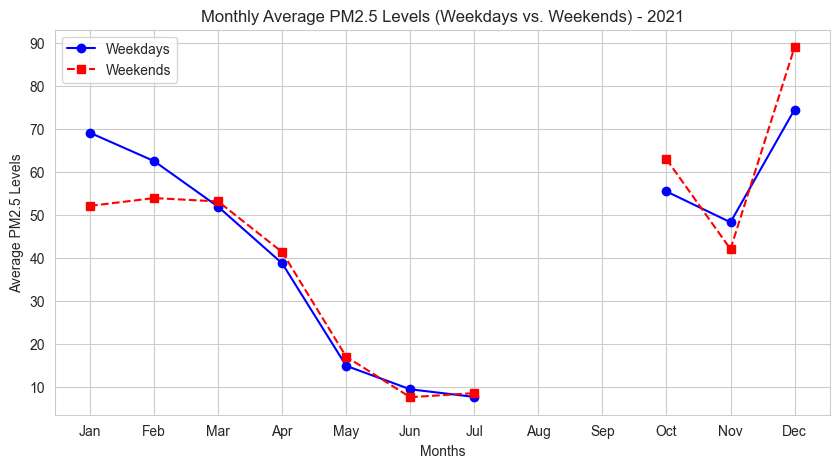

In [112]:
#2.3 


df_2021 = df_data[df_data['Timestamp'].dt.year == 2021]

df_2021_filtered = df_2021[df_2021['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'] 

# Filter for weekdays & weekends
df_2021_filtered_weekdays = df_2021_filtered[df_2021_filtered['Timestamp'].dt.weekday < 5]

df_2021_filtered_weekends = df_2021_filtered[df_2021_filtered['Timestamp'].dt.weekday >= 5]

# Calculate monthly average
monthly_avg_pm25_weekdays = df_2021_filtered_weekdays.groupby(df_2021_filtered_weekdays['Timestamp'].dt.month)['PM2.5'].mean()

monthly_avg_pm25_weekends = df_2021_filtered_weekends.groupby(df_2021_filtered_weekends['Timestamp'].dt.month)['PM2.5'].mean()

print("Monthly Average PM2.5 on Weekdays:\n", monthly_avg_pm25_weekdays)
print("\nOverall Average PM2.5 on Weekends:", monthly_avg_pm25_weekends)

months = range(1, 13)  


#Plotting the graph
plt.figure(figsize=(10, 5))
plt.plot(months, monthly_avg_pm25_weekdays, marker='o', linestyle='-', color='b', label='Weekdays')
plt.plot(months, monthly_avg_pm25_weekends, marker='s', linestyle='--', color='r', label='Weekends')

plt.xlabel('Months')
plt.ylabel('Average PM2.5 Levels')
plt.title('Monthly Average PM2.5 Levels (Weekdays vs. Weekends) - 2021')
plt.xticks(months, [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend()
plt.grid(True)
plt.show()


In [131]:
# 3.1

monsoon_data = df_data[df_data['Season'] == 'Monsoon']
summer_data = df_data[df_data['Season'] == 'Summer']

avg_PM25_monsoon = (monsoon_data).groupby('state')['PM2.5'].mean()
avg_PM25_summer = (summer_data).groupby('state')['PM2.5'].mean()

percent_change_data = ((avg_PM25_monsoon - avg_PM25_summer)/(avg_PM25_summer)).abs()*100
# Since we are only interested in the magnitude of the change

print('The percentage increase or decrease in PM2.5 levels during monsoon months compared to summer months is:\n', percent_change_data)

year2022 = df_data['Timestamp'].dt.year == 2022

avg_PM25_monsoon2022 = monsoon_data[year2022].groupby('state')['PM2.5'].mean()
avg_PM25_summer2022 = summer_data[year2022].groupby('state')['PM2.5'].mean()

percent_change_data2022 = ((avg_PM25_monsoon2022 - avg_PM25_summer2022)/(avg_PM25_summer2022)).abs()*100
max_change_state2022 = percent_change_data2022.idxmax()
max_change2022 = percent_change_data2022[max_change_state2022]

print(f'\nThe state with the maximum change for the year 2022 was {max_change_state2022} with a change of {max_change2022} percent')

The percentage increase or decrease in PM2.5 levels during monsoon months compared to summer months is:
 state
Andhra Pradesh       29.945748
Arunachal Pradesh    49.677283
Assam                52.796433
Bihar                48.831388
Chandigarh           36.141662
Chhattisgarh         39.370959
Delhi                45.636950
Gujarat              38.947405
Haryana              34.279577
Himachal Pradesh     21.146583
Jammu and Kashmir    13.465576
Jharkhand            19.323313
Karnataka            42.997896
Kerala               30.136673
Madhya Pradesh       45.972367
Maharashtra          53.547309
Manipur              59.695483
Meghalaya            55.257015
Mizoram              80.734355
Nagaland             62.095476
Odisha               50.471366
Puducherry           22.449113
Punjab               22.143482
Rajasthan            30.814302
Sikkim               64.189219
Tamil Nadu           18.588194
Telangana            44.650635
Tripura              57.360633
Uttar Pradesh        

C:\Users\jay20\AppData\Local\Temp\ipykernel_14048\4212595407.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_PM25_monsoon2022 = monsoon_data[year2022].groupby('state')['PM2.5'].mean()
C:\Users\jay20\AppData\Local\Temp\ipykernel_14048\4212595407.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_PM25_summer2022 = summer_data[year2022].groupby('state')['PM2.5'].mean()


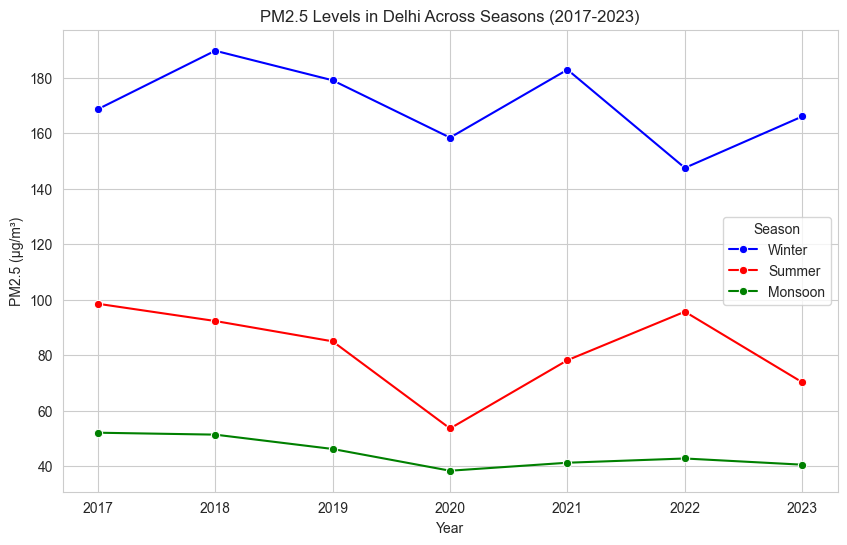

In [114]:
#3.2

df_data_delhi = df_data[df_data['city'] == 'Delhi']
df_data_delhi_17_23 = df_data_delhi[df_data_delhi["Timestamp"].dt.year <= 2023]

# Assign seasons
df_data_delhi_17_23.loc[:, 'Season'] = df_data_delhi_17_23['Timestamp'].dt.month.apply(assign_season)


df_data_delhi_17_23 = df_data_delhi_17_23.dropna(subset=['PM2.5'])

# Group by Year and Season, then compute mean PM2.5 levels
seasonal_trends = df_data_delhi_17_23.groupby([df_data_delhi_17_23['Timestamp'].dt.year, 'Season'])['PM2.5'].mean().reset_index()
seasonal_trends.rename(columns={'Timestamp': 'Year'}, inplace=True)

# Define seasons to plot
seasons = ["Winter", "Summer", "Monsoon"]
colors = {"Winter": "blue", "Summer": "red", "Monsoon": "green"}

# Plot all seasons in a single plot
plt.figure(figsize=(10, 6))
for season in seasons:
    season_data = seasonal_trends[seasonal_trends['Season'] == season]
    sns.lineplot(x=season_data['Year'], y=season_data['PM2.5'], marker='o', label=season, color=colors[season])

plt.title("PM2.5 Levels in Delhi Across Seasons (2017-2023)")
plt.xlabel("Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend(title="Season")
plt.grid(True)
plt.show()

#pollution in winters is highest followed by summer and then monsoon

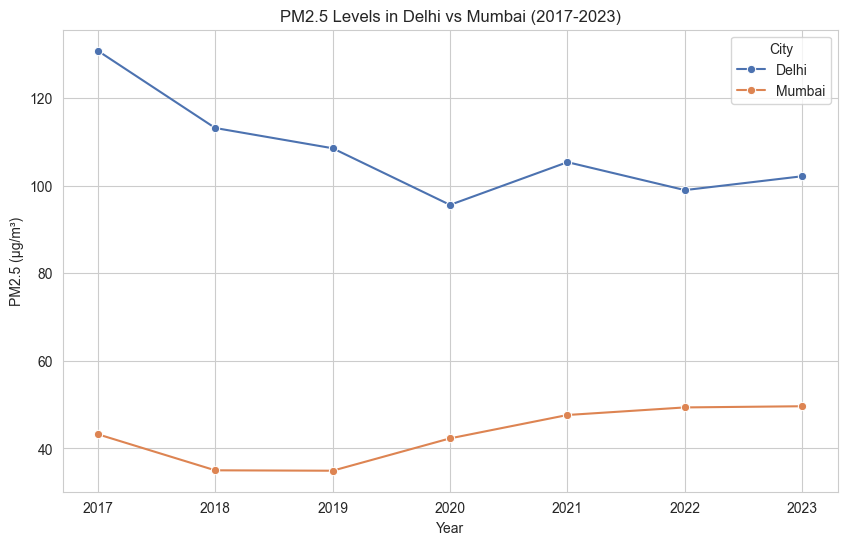

In [115]:
#3.3 

df_data_mumbai = df_data[df_data['city'] == 'Mumbai']
df_data_mumbai_1723 = df_data_mumbai[df_data_mumbai["Timestamp"].dt.year <= 2023]

# Combine both cities' data
df_data_cities = pd.concat([df_data_delhi_17_23, df_data_mumbai_1723])


df_data_cities = df_data_cities.dropna(subset=['PM2.5'])

# Group by Year and City, then compute mean PM2.5 levels
city_trends = df_data_cities.groupby([df_data_cities['Timestamp'].dt.year, 'city'])['PM2.5'].mean().reset_index()
city_trends.rename(columns={'Timestamp': 'Year'}, inplace=True)


plt.figure(figsize=(10, 6))
sns.lineplot(data=city_trends, x='Year', y='PM2.5', hue='city', marker='o')

plt.title("PM2.5 Levels in Delhi vs Mumbai (2017-2023)")
plt.xlabel("Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.legend(title="City")
plt.grid(True)
plt.show()



In [116]:
#4.1 

# Group by state and count unique monitoring stations
station_counts = df_data.groupby("state")["station"].nunique().reset_index()

# Rename the 'state' column to match the column name in df_state_data
station_counts.rename(columns={"state": "State"}, inplace=True)

# Merge station_counts with df_state_data to get station counts for each state
merged_df = df_state_data.merge(station_counts, on="State", how="left")

merged_df["station"] = merged_df["station"].fillna(0)

merged_df["stations_per_population"] = merged_df["station"] / merged_df["Population"]

state_with_highest_ratio = merged_df.loc[merged_df["stations_per_population"].idxmax(), "State"]

print("State with highest monitoring stations relative to population:", state_with_highest_ratio)



State with highest monitoring stations relative to population: Chandigarh


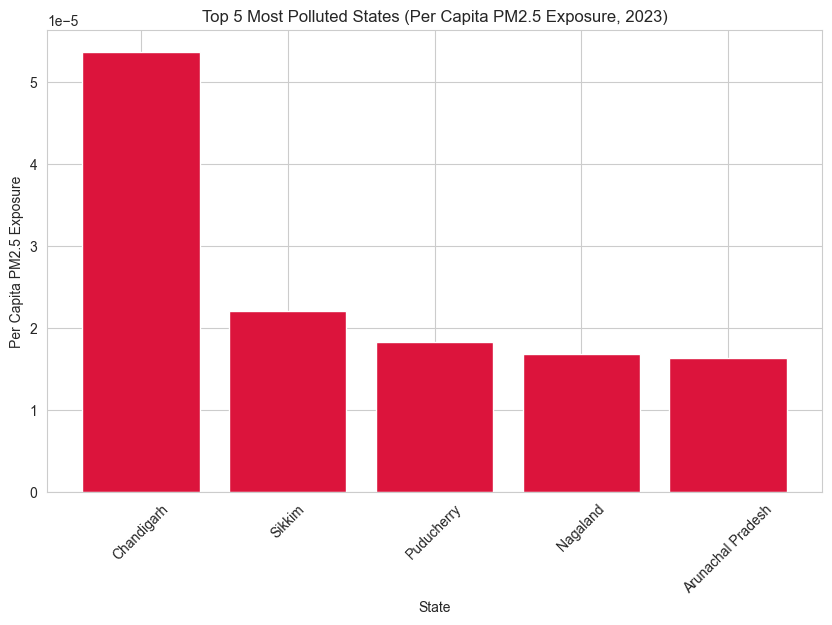

,State,Population,Area (km2),Avg_PM2.5,Per_Capita_PM2.5
0,Uttar Pradesh,199812341,240928,70.893996,3.548029e-07
1,Maharashtra,112374333,307713,43.491415,3.870227e-07
2,Bihar,104099452,94163,76.918759,7.388969e-07
3,West Bengal,91276115,88752,54.611086,5.983064e-07
4,Madhya Pradesh,72626809,308252,45.874375,6.316452e-07
5,Tamil Nadu,72147030,130058,31.289620,4.336924e-07
6,Rajasthan,68548437,342239,54.230341,7.911244e-07
7,Karnataka,61095297,191791,28.894840,4.729470e-07
8,Gujarat,60439692,196024,52.462657,8.680166e-07
9,Andhra Pradesh,49577103,162975,35.049347,7.069664e-07


In [117]:
#4.2

pm25_avg = df_data.groupby("state")["PM2.5"].mean().reset_index()

pm25_avg.rename(columns={"state": "State", "PM2.5": "Avg_PM2.5"}, inplace=True)

# Merge with population data
merged_df = df_state_data.merge(pm25_avg, on="State", how="left")

# Compute per capita PM2.5
merged_df["Per_Capita_PM2.5"] = merged_df["Avg_PM2.5"] / merged_df["Population"]

# Select top 5 most polluted states
top_5_states = merged_df.nlargest(5, "Per_Capita_PM2.5")

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(top_5_states["State"], top_5_states["Per_Capita_PM2.5"], color='crimson')
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure, 2023)")
plt.xticks(rotation=45)
plt.show()
merged_df


In [118]:
merged_df

,State,Population,Area (km2),Avg_PM2.5,Per_Capita_PM2.5
0,Uttar Pradesh,199812341,240928,70.893996,3.548029e-07
1,Maharashtra,112374333,307713,43.491415,3.870227e-07
2,Bihar,104099452,94163,76.918759,7.388969e-07
3,West Bengal,91276115,88752,54.611086,5.983064e-07
4,Madhya Pradesh,72626809,308252,45.874375,6.316452e-07
5,Tamil Nadu,72147030,130058,31.289620,4.336924e-07
6,Rajasthan,68548437,342239,54.230341,7.911244e-07
7,Karnataka,61095297,191791,28.894840,4.729470e-07
8,Gujarat,60439692,196024,52.462657,8.680166e-07
9,Andhra Pradesh,49577103,162975,35.049347,7.069664e-07


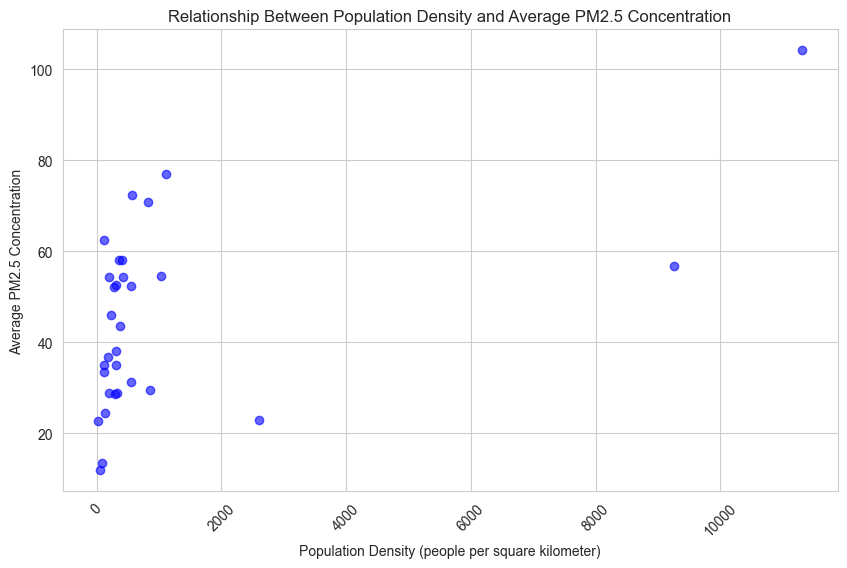

In [120]:
# 4.3 

#Finding population density of each state
merged_df["Population Density"] = merged_df["Population"] / merged_df["Area (km2)"]


plt.figure(figsize=(10, 6))
plt.scatter(merged_df["Population Density"], merged_df["Avg_PM2.5"], color='blue', alpha=0.6)

plt.xlabel("Population Density (people per square kilometer)")
plt.ylabel("Average PM2.5 Concentration")

plt.title("Relationship Between Population Density and Average PM2.5 Concentration")
plt.xticks(rotation=45)

plt.show()



The state with the highest PM2.5 concentration per square kilometer is Chandigarh


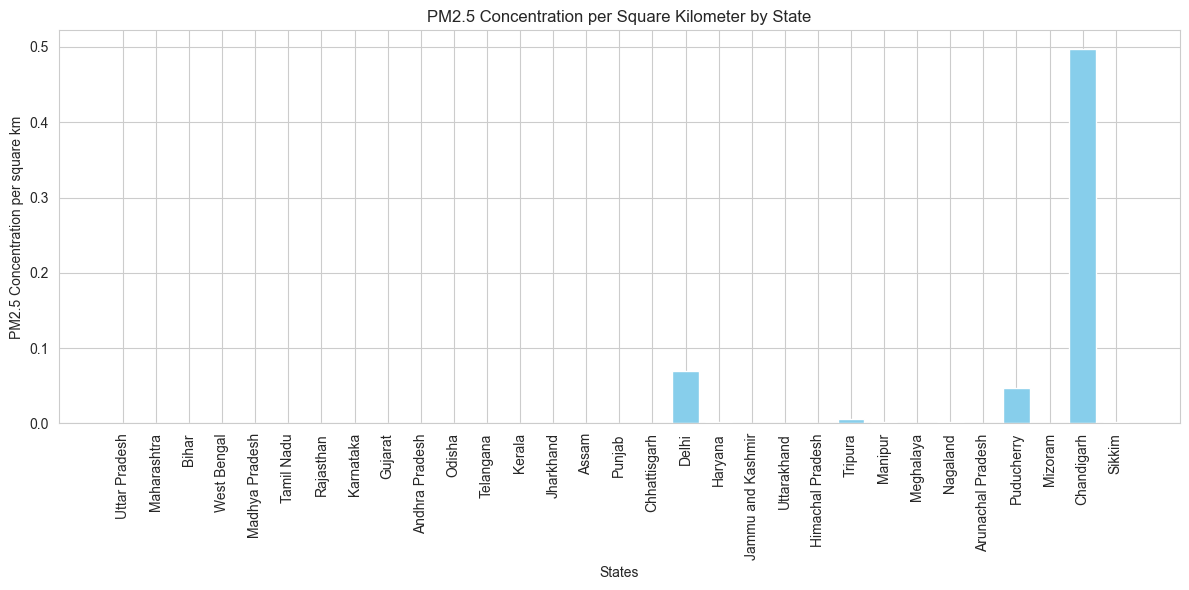

In [ ]:
# Question 5.1

pm25_avg = df_data.groupby("state", as_index = False)["PM2.5"].mean()

# Rename the 'state' column to match the column name in state_data
pm25_avg.rename(columns={"state": "State", 'PM2.5': 'Avg_PM2.5'}, inplace=True)

# Merge with population data
merged_df = df_state_data.merge(pm25_avg, on="State")

# Calculating the PM2.5 concentration per square kilometer for each state
merged_df['PM2.5_per_km2'] = merged_df['Avg_PM2.5'] / merged_df['Area (km2)']


highest_PM25_state = merged_df.loc[merged_df['PM2.5_per_km2'].idxmax(), 'State']
print(f'The state with the highest PM2.5 concentration per square kilometer is {highest_PM25_state}')

# Plotting the pollution levels for all states relative to their area
plt.figure(figsize = (12,6))
plt.bar(merged_df['State'], merged_df['PM2.5_per_km2'], color='skyblue')
plt.xlabel('States')
plt.ylabel('PM2.5 Concentration per square km')
plt.title('PM2.5 Concentration per Square Kilometer by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




The state with the highest density of monitoring stations relative to its area is Delhi


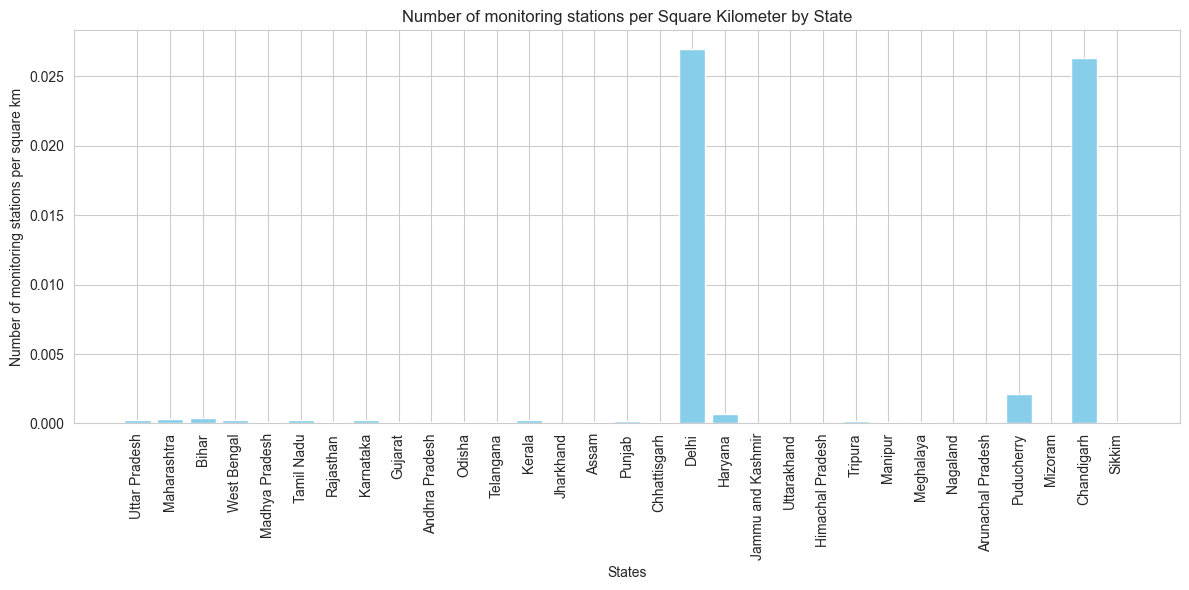

In [ ]:
# 5.2

station_count = df_data.groupby("state", as_index= False)["station"].nunique()

station_count.rename(columns={"state": "State", 'station': 'station_count'}, inplace=True) # Renaming the 'state' column

# Merging the state_data and station_count dataframes to store both information
merged_df = df_state_data.merge(station_count, on = 'State', how = 'left')

# Calculating the number of monitoring stations per square kilometer for each state
merged_df['station_density'] = merged_df['station_count'] / merged_df['Area (km2)']

highest_station_density_state = merged_df.loc[merged_df['station_density'].idxmax(), 'State']
print(f'The state with the highest density of monitoring stations relative to its area is {highest_station_density_state}')

# Plotting the number of monitoring stations per square kilometer for each state
plt.figure(figsize = (12,6))
plt.bar(merged_df['State'], merged_df['station_density'], color='skyblue')
plt.xlabel('States')
plt.ylabel('Number of monitoring stations per square km')
plt.title('Number of monitoring stations per Square Kilometer by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 5.3

# Calculating population density from the state_data dataframe
df_state_data['Population_density'] = df_state_data['Population'] / df_state_data['Area (km2)']

year2021 = df_data['Timestamp'].dt.year == 2021
avg_PM25_2021 = df_data[year2021].groupby('state', as_index = False)['PM2.5'].mean() 

avg_PM25_2021.rename(columns={"state": "State", 'PM2.5': 'Avg_PM2.5_2021'}, inplace=True) # Renaming the 'state' column

merged_df = df_state_data.merge(avg_PM25_2021, on = 'State')

given_states = (merged_df['State'].isin(['Madhya Pradesh', 'Maharashtra']))
req_data = merged_df[given_states]
req_data

# Population density alone does not directly determine pollution levels, as Maharashtra's higher density (365.19 people/km²)
# correlates with slightly lower PM2.5 levels (46.44 µg/m³) than Madhya Pradesh's lower density (235.61 people/km²) and higher PM2.5 levels (47.10 µg/m³),

,State,Population,Area (km2),Population_density,Avg_PM2.5_2021
1,Maharashtra,112374333,307713,365.192023,46.440044
4,Madhya Pradesh,72626809,308252,235.608557,47.095952


In [ ]:
#6.1 

# Converting the dtypes of the last 5 columns to float 
cols_to_convert = [
    "Amount released during FY 2019-20",
    "Amount released during FY 2020-21",
    "Amount released during FY 2021-22",
    "Total fund released",
    "Utilisation as on June 2022"
]

df_funding[cols_to_convert] = df_funding[cols_to_convert].replace("-", '0').astype(float)


# Total NCAP funding for each state in FY 2021-2022
statewise_NCAP_funding2021 = df_funding.groupby('State', as_index = False)['Amount released during FY 2021-22'].sum()


states_funded = np.array(statewise_NCAP_funding2021.loc[statewise_NCAP_funding2021['Amount released during FY 2021-22']!= 0, 'State'])

year2021 = df_data['Timestamp'].dt.year == 2021
pm25_2021 = df_data[year2021].groupby('state', as_index = False)['PM2.5'].mean()

pm25_2021['NCAP_funded'] = pm25_2021['state'].apply(lambda x: 'Yes' if x in states_funded else 'No')

# Calculate mean PM2.5 conc of NCAP funded and non-funded states 
pm25_funded_states = pm25_2021[pm25_2021['NCAP_funded'] == 'Yes']['PM2.5'].mean()
pm25_non_funded_states = pm25_2021[pm25_2021['NCAP_funded'] == 'No']['PM2.5'].mean()


print('Average PM2.5 concentration of the states that recieved NCAP funding in the FY 2021-22 was:', pm25_funded_states)
print('Average PM2.5 concentration of the states that did not recieve NCAP funding in the FY 2021-22 was:', pm25_non_funded_states)

Average PM2.5 concentration of the states that recieved NCAP funding in the FY 2021-22 was: 52.62011130212364
Average PM2.5 concentration of the states that did not recieve NCAP funding in the FY 2021-22 was: 38.77822830881315


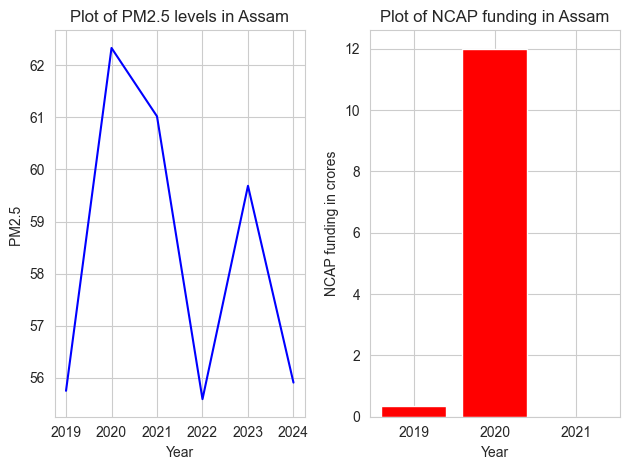

In [ ]:
# 6.2

# Calculating average PM2.5 levels in Assam for each year
Assam_data = df_data[df_data['state'] == 'Assam']
Assam_PM25 = Assam_data.groupby(Assam_data['Timestamp'].dt.year)['PM2.5'].mean().dropna()

# Calculating NCAP funding for Assam in each year 
Assam_funding = df_funding.groupby('State')[['Amount released during FY 2019-20', 'Amount released during FY 2020-21','Amount released during FY 2021-22']].sum().loc['Assam']

years = [2019,2020,2021]
Assam_funding.index = years

# Plotting
fig, ax = plt.subplots(1,2)
ax[0].plot(Assam_PM25,color='blue',label='PM2.5 value')
ax[1].bar(Assam_funding.index,Assam_funding.values, color='red',label='NCAP Funding')
ax[0].set_xlabel("Year")
ax[1].set_xlabel('Year')
ax[0].set_ylabel("PM2.5 ")
ax[1].set_ylabel("NCAP funding in crores")
ax[0].set_title("Plot of PM2.5 levels in Assam")
ax[1].set_title("Plot of NCAP funding in Assam")
fig.tight_layout()
plt.show()

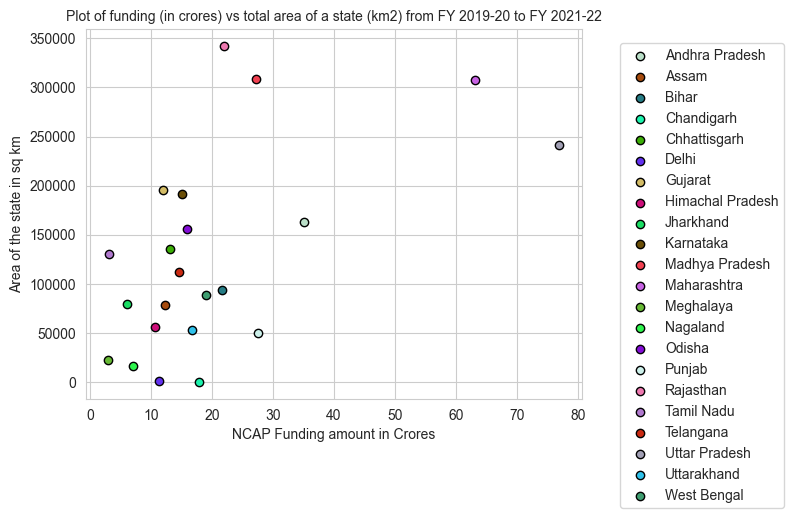

In [ ]:
# #6.3

areaState = df_state_data.loc[:, ['State', 'Area (km2)']]


fund_state = df_funding.groupby('State')['Total fund released'].sum()
fund_area = pd.merge(fund_state,areaState, on='State', how='inner')

fund_area.set_index('State',inplace=True)
funding=np.array(fund_area['Total fund released'])

area=np.array(fund_area['Area (km2)'])
states=np.array(fund_area.index)
colors=np.random.rand(len(funding),3)

for i in range (0,len(area)):
    plt.scatter(funding[i],area[i],color=colors[i],edgecolor='black',label=states[i])
plt.title("Plot of funding (in crores) vs total area of a state (km2) from FY 2019-20 to FY 2021-22",fontsize='10')

plt.ylabel("Area of the state in sq km")
plt.xlabel("NCAP Funding amount in Crores")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=1)
plt.show()

In [ ]:
#7.1

df_data_2023 = df_data[df_data["Timestamp"].dt.year == 2023]

most_polluted_city = df_data_2023.groupby("city")["PM2.5"].mean().idxmax()

df_most_polluted_city = df_data_2023[df_data_2023["city"] == most_polluted_city]

# Count total days and hazardous days
total_days = df_most_polluted_city["Timestamp"].dt.date.nunique()
hazardous_days = df_most_polluted_city[df_most_polluted_city["PM2.5"] >= 300]["Timestamp"].dt.date.nunique()

# % of hazardous days
hazardous_percentage = (hazardous_days / total_days) * 100

print(f"Most Polluted City in 2023: {most_polluted_city}")
print(f"Percentage of hazardous days: {hazardous_percentage:.2f}%")


Most Polluted City in 2023: Darbhanga
Percentage of hazardous days: 0.82%


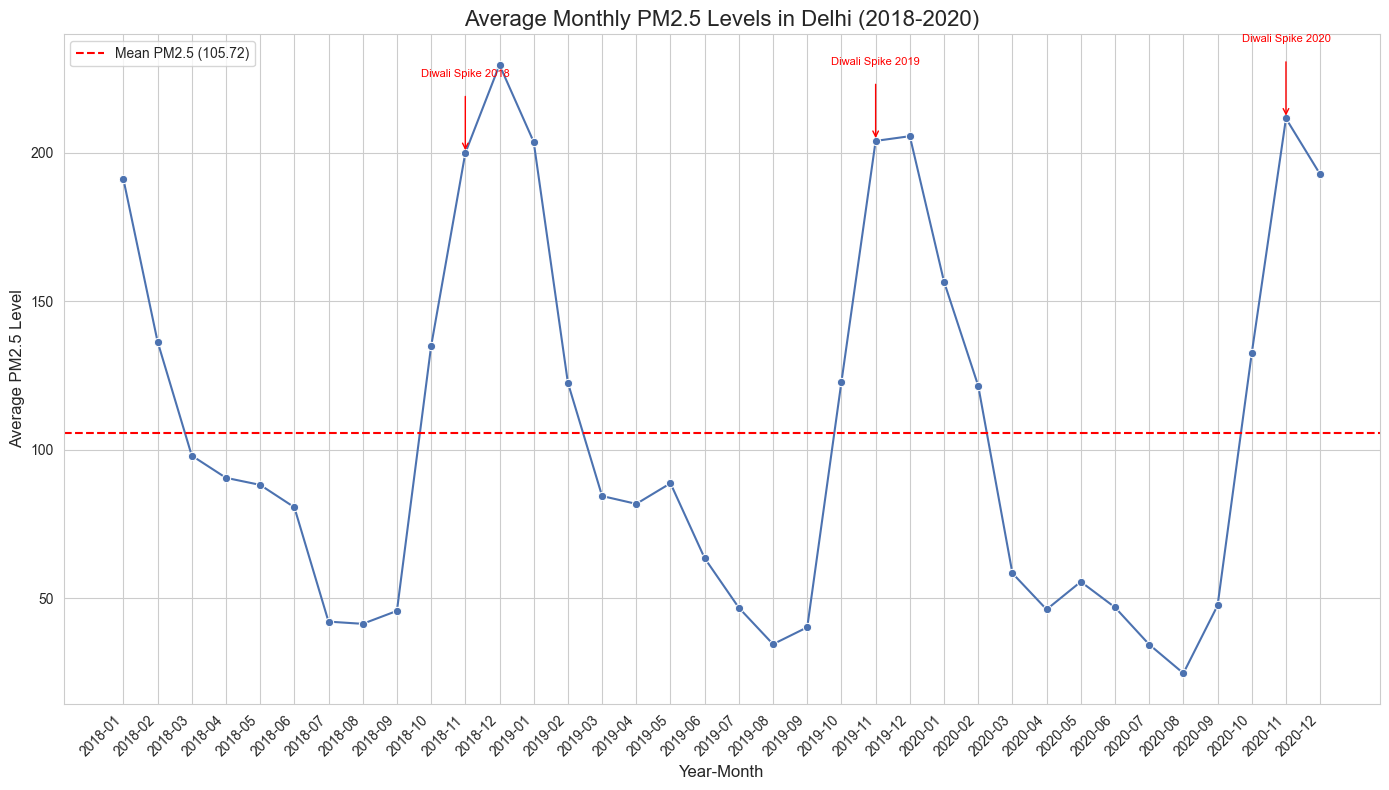

In [ ]:
#7.2 

df_delhi = df_data_delhi[(df_data_delhi['city'] == 'Delhi') & 
                         (df_data_delhi['Timestamp'].dt.year.isin([2018, 2019, 2020]))]

df_delhi = df_delhi.copy()
df_delhi.loc[:, 'YearMonth'] = df_delhi['Timestamp'].dt.to_period('M')

monthly_avg_pm25 = df_delhi.groupby('YearMonth')['PM2.5'].mean().reset_index()
monthly_avg_pm25['YearMonth'] = monthly_avg_pm25['YearMonth'].astype(str)

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
sns.set_palette("deep")

ax = sns.lineplot(data=monthly_avg_pm25, x='YearMonth', y='PM2.5', marker='o')

plt.title('Average Monthly PM2.5 Levels in Delhi (2018-2020)', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average PM2.5 Level', fontsize=12)
plt.xticks(rotation=45, ha='right')

for year in [2018, 2019, 2020]:
    year_data = monthly_avg_pm25[monthly_avg_pm25['YearMonth'].str.startswith(str(year))]
    oct_nov_data = year_data[year_data['YearMonth'].str.endswith('-10') | year_data['YearMonth'].str.endswith('-11')]
    if not oct_nov_data.empty:
        max_pm25 = oct_nov_data['PM2.5'].max()
        max_index = oct_nov_data['PM2.5'].idxmax()
        ax.annotate('', 
                    xy=(max_index, max_pm25), 
                    xytext=(max_index, max_pm25 + 20),
                    arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='->'))
        ax.text(max_index, max_pm25 + 25, f'Diwali Spike {year}', 
                ha='center', va='bottom', fontsize=8, color='red')

mean_pm25 = monthly_avg_pm25['PM2.5'].mean()
plt.axhline(y=mean_pm25, color='r', linestyle='--', label=f'Mean PM2.5 ({mean_pm25:.2f})')

plt.legend()
plt.tight_layout()
plt.show()


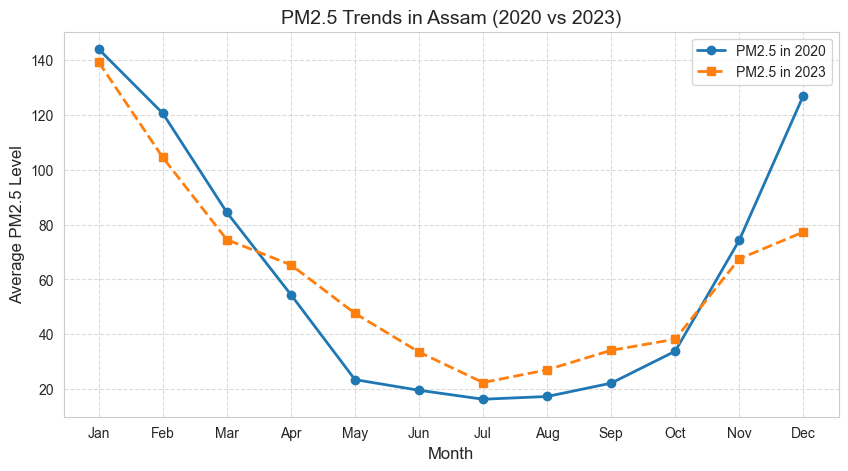

In [ ]:
#7.3

top_funded_state = df_funding.groupby("State")["Amount released during FY 2020-21"].sum().idxmax()

df_2020 = df_data[df_data["Timestamp"].dt.year == 2020]
df_2023 = df_data[df_data["Timestamp"].dt.year == 2023]

df_state_2020 = df_2020[df_2020["state"] == top_funded_state]
df_state_2023 = df_2023[df_2023["state"] == top_funded_state]

# Average PM2.5 levels per month
pm25_2020 = df_state_2020.groupby(df_state_2020["Timestamp"].dt.month)["PM2.5"].mean().dropna()
pm25_2023 = df_state_2023.groupby(df_state_2023["Timestamp"].dt.month)["PM2.5"].mean().dropna()

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid") 

plt.plot(pm25_2020.index.
         astype(int), pm25_2020.values, marker='o', label="PM2.5 in 2020", linewidth=2)
plt.plot(pm25_2023.index.astype(int), pm25_2023.values, marker='s', linestyle="dashed", label="PM2.5 in 2023", linewidth=2)

plt.xlabel("Month", fontsize=12)
plt.ylabel("Average PM2.5 Level", fontsize=12)
plt.title(f"PM2.5 Trends in {top_funded_state} (2020 vs 2023)", fontsize=14)
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()



In [ ]:

import cartopy.crs as ccrs
import cartopy.feature as cfeature


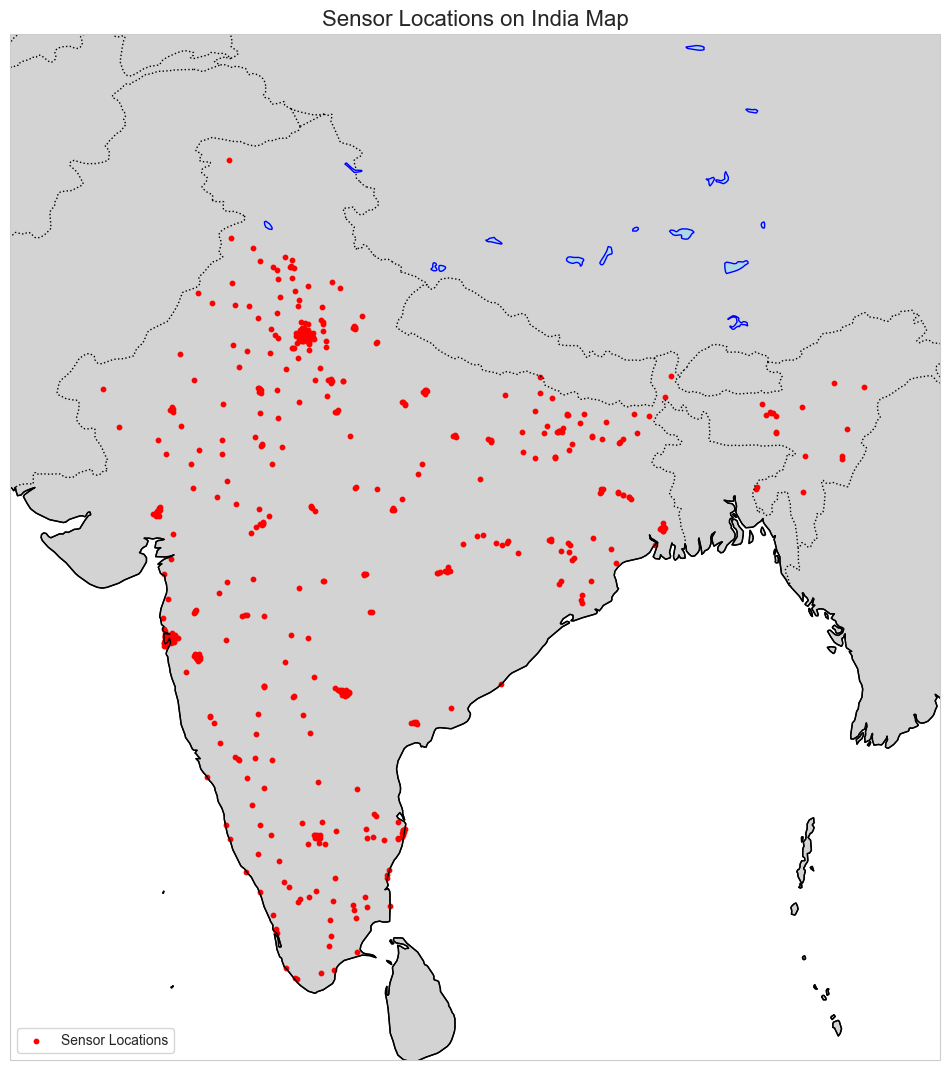

In [ ]:
#7.4
# Extract unique latitude and longitude pairs
unique_locations = df_data[['latitude', 'longitude']].dropna().drop_duplicates()

fig = plt.figure(figsize=(12, 14))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add features to the map
ax.set_extent([68, 97, 6, 38], crs=ccrs.PlateCarree())  # Coordinates of cornets of map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='lightgrey')
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='lightblue')

# Plot sensor locations on the map
plt.scatter(
    unique_locations['longitude'], 
    unique_locations['latitude'], 
    color='red', 
    s=10, 
    transform=ccrs.PlateCarree(), 
    label='Sensor Locations'
)

plt.title('Sensor Locations on India Map', fontsize=16)
plt.legend(loc='lower left')
plt.show()


Cities in which Air Quality worsned due to lockdown

Impact of Lockdown on Air Quality (2020-2021):
           state            city  avg_PM25_pre_lockdown  avg_PM25_lockdown  \
89     Karnataka  Chamarajanagar              18.123983          29.609561   
112       Kerala           Eloor              10.359492          15.715538   
157  Maharashtra     Navi Mumbai              38.697913          56.201982   
147  Maharashtra          Kalyan              36.627820          51.717276   
153  Maharashtra          Mumbai              34.911579          46.388483   
..           ...             ...                    ...                ...   
271  Uttarakhand        Kashipur                    NaN                NaN   
272  Uttarakhand       Rishikesh                    NaN                NaN   
274  West Bengal     Barrackpore                    NaN                NaN   
275  West Bengal        Durgapur                    NaN          94.834933   
276  West Bengal          Haldia                    NaN                NaN   

     percent_cha

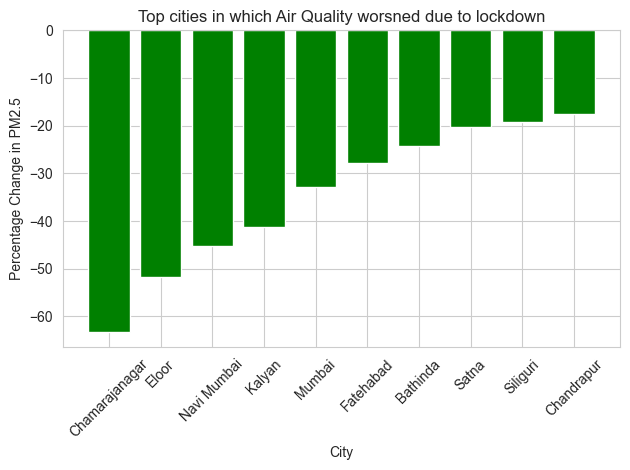

In [134]:
#8

df_data['Timestamp'] = pd.to_datetime(df_data['Timestamp'])

lockdown_start = '2020-03-01'
lockdown_end = '2021-06-30'
lockdown_data = df_data[(df_data['Timestamp'] >= lockdown_start) & (df_data['Timestamp'] <= lockdown_end)]

lockdown_pm25 = lockdown_data.groupby(['state', 'city'])['PM2.5'].mean().reset_index()
lockdown_pm25.rename(columns={'PM2.5': 'avg_PM25_lockdown'}, inplace=True)

pre_lockdown_data = df_data[df_data['Timestamp'].dt.year == 2019]

pre_lockdown_pm25 = pre_lockdown_data.groupby(['state', 'city'])['PM2.5'].mean().reset_index()
pre_lockdown_pm25.rename(columns={'PM2.5': 'avg_PM25_pre_lockdown'}, inplace=True)

comparison_df = pd.merge(lockdown_pm25, pre_lockdown_pm25, on=['state', 'city'], how='inner')

comparison_df['percent_change'] = ((comparison_df['avg_PM25_pre_lockdown'] - comparison_df['avg_PM25_lockdown']) / 
                                   comparison_df['avg_PM25_pre_lockdown']) * 100

comparison_df.sort_values(by='percent_change', ascending=True, inplace=True)

print("Impact of Lockdown on Air Quality (2020-2021):")
print(comparison_df[['state', 'city', 'avg_PM25_pre_lockdown', 'avg_PM25_lockdown', 'percent_change']])

comparison_df.to_csv('lockdown_air_quality_analysis.csv', index=False)

top_cities = comparison_df.head(10)
plt.bar(top_cities['city'], top_cities['percent_change'], color='green')
plt.xlabel('City')
plt.ylabel('Percentage Change in PM2.5')
plt.title('Top cities in which Air Quality worsned due to lockdown')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

